<a href="https://colab.research.google.com/github/Yag0d/biblioteca_pandas/blob/main/caseVarejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas

In [2]:
import pandas as pd

In [3]:
import seaborn as sns


#Configuração dos dados

In [9]:
vendas = pd.read_excel("varejo.xlsx")

In [10]:
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [11]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [12]:
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

Tratamento dos dados

In [13]:
vendas.idcanalvenda = vendas.idcanalvenda.str.replace("APP","Aplicativo")
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [14]:
vendas.groupby("bandeira").idcompra.nunique()

bandeira
A    27679
B    38483
Name: idcompra, dtype: int64

In [15]:
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios e Inovacoes     3548
Alimentos                     2
Ar e Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza e Saude             4626
Brinquedos                 1320
Cama, Mesa e Banho          153
Casa e Construcao           263
Cine e Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte e Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos Musicais         1
Linha Industrial             86
Malas e Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet Shop                     43
Produtos de Limpeza         713
Relogios                    134
TV e Video                    5
TVs e Acessorios           5326
Tablets                    1770
Telefones e Celulares 

In [16]:
vendas.groupby("estado").idcompra.nunique()

estado
AC       10
AL      461
AM       15
AP        3
BA     2028
CE     1007
DF     1902
ES     1254
GO     1603
MA      129
MG    10538
MT      510
PA      108
PB      536
PE     1632
PI      247
PR     2754
RJ    16213
RN      463
RO       15
RR        7
RS     4099
SC     1932
SE      340
SP    25962
TO      101
Name: idcompra, dtype: int64

In [17]:
vendas.Nome_Departamento = vendas.Nome_Departamento.str.replace(" ", "_")
vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

In [18]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


#Tratamento de nulos

In [21]:
vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [22]:
vendas.estado.fillna("MS", inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [23]:
vendas[vendas["Preço"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,MS,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,MS,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,MS,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,MS,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,MS,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,MS,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,MS,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,MS,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,MS,17784


In [24]:
media_preco = vendas.Preço.mean()
vendas.Preço.fillna(media_preco, inplace=True)

In [25]:
media_preco


906.5891285439033

In [26]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


#Análise exploratória

In [28]:
vendas[["Preço", "Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [29]:
preco_errado = vendas.query("Preço > Preço_com_frete")
preco_errado

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560000,791.280,Telefones_e_Celulares,SP,15042
96,382380,Internet,A,2023-04-26,906.589129,879.200,Telefones_e_Celulares,MS,5804
118,106845,Mobile,A,2023-03-04,658.400000,329.200,Eletroportateis,BA,14702
119,107130,Mobile,A,2023-04-24,2398.400000,1207.120,Eletrodomesticos,SC,26746
120,165450,Mobile,A,2023-04-17,612.960000,317.128,Bebes,SP,11677
...,...,...,...,...,...,...,...,...,...
77383,52430,Internet,B,2023-04-10,906.589129,159.992,Eletroportateis,MS,8647
77454,398005,Mobile,B,2023-01-06,906.589129,386.800,Eletrodomesticos,MS,10108
77807,281255,Aplicativo,A,2023-04-26,906.589129,303.920,Eletroportateis,MS,14347
78610,399680,Aplicativo,A,2023-04-19,906.589129,339.912,Eletroportateis,MS,20873


In [30]:
vendas_corretas = vendas.query("Preço < Preço_com_frete")
vendas_corretas

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060
...,...,...,...,...,...,...,...,...,...
80023,351250,Internet,B,2023-01-29,661.68,676.736,Telefones_e_Celulares,SP,11429
80069,362035,Mobile,A,2023-04-25,95.92,101.600,Beleza_e_Saude,SP,26
80090,466615,Internet,B,2023-03-30,735.20,750.256,Telefones_e_Celulares,SP,3128
80104,335120,Aplicativo,B,2023-04-17,55.92,60.776,Beleza_e_Saude,RJ,13206


In [31]:
vendas_corretas.describe()

,idcompra,Preço,Preço_com_frete,cliente_Log
count,22047.000000,22047.000000,22047.000000,22047.000000
mean,253799.955550,549.518401,567.332688,13856.313013
std,144794.628563,846.295127,863.458763,8049.120135
min,25.000000,8.720000,9.512000,1.000000
25%,127670.000000,93.528000,100.800000,6858.000000
50%,257885.000000,183.200000,193.912000,13845.000000
75%,379705.000000,661.680000,676.736000,20801.000000
max,499960.000000,14391.200000,14407.120000,27982.000000


In [32]:
vendas_corretas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060


#Departamentos mais vendidos:

In [41]:
vendas_corretas.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index().head(5)

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366


#Média de preço com frete por departamento

In [40]:
round(vendas_corretas.groupby("Nome_Departamento").Preço_com_frete.agg("mean").sort_values(ascending = False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


#Quantidade de vendas por mês

In [42]:
vendas_corretas["mes"] = vendas_corretas["Data"].dt.month
vendas_corretas

<ipython-input-42-9d9322b134c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_corretas["mes"] = vendas_corretas["Data"].dt.month


,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes
2,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3
4,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3
8,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2
19,258580,Mobile,A,2023-03-27,107.76,109.344,Bebes,ES,7662,3
22,306675,Mobile,B,2023-02-17,471.20,511.120,Eletrodomesticos,RJ,15060,2
...,...,...,...,...,...,...,...,...,...,...
80023,351250,Internet,B,2023-01-29,661.68,676.736,Telefones_e_Celulares,SP,11429,1
80069,362035,Mobile,A,2023-04-25,95.92,101.600,Beleza_e_Saude,SP,26,4
80090,466615,Internet,B,2023-03-30,735.20,750.256,Telefones_e_Celulares,SP,3128,3
80104,335120,Aplicativo,B,2023-04-17,55.92,60.776,Beleza_e_Saude,RJ,13206,4


In [44]:
vendas_corretas.groupby("mes").idcompra.nunique().sort_values(ascending = False)

mes
3    5590
4    5454
1    5309
2    5138
Name: idcompra, dtype: int64

#join de tabelas

In [45]:
cliente = pd.read_excel("cliente_varejo.xlsx")
cliente

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207
...,...,...,...
26420,20177,48,3132
26421,23977,31,5108
26422,25398,35,13136
26423,26390,50,12304


In [46]:
cliente[["idade", "renda"]].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [47]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [48]:
cliente = cliente.astype({"renda":"float"})
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [50]:
vendas_cliente = vendas_corretas.merge(cliente, how = "left", on = "cliente_Log")
vendas_cliente

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0
...,...,...,...,...,...,...,...,...,...,...,...,...
42773,335120,Aplicativo,B,2023-04-17,55.92,60.776,Beleza_e_Saude,RJ,13206,4,81,13179.0
42774,335120,Aplicativo,B,2023-04-17,55.92,60.776,Beleza_e_Saude,RJ,13206,4,42,11816.0
42775,376985,Internet,B,2023-02-10,661.68,676.736,Telefones_e_Celulares,RJ,5400,2,83,4104.0
42776,376985,Internet,B,2023-02-10,661.68,676.736,Telefones_e_Celulares,RJ,5400,2,43,6005.0


#Média de renda para cada tipo de canal de venda

In [55]:
agg_idcanal_renda = round(vendas_cliente.groupby("idcanalvenda")["renda"].agg("mean").sort_values(ascending = False).reset_index(),2)
agg_idcanal_renda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


#Média de idade de clientes por bandeira

In [59]:
agg_idade_bandeira = round(vendas_cliente.groupby("bandeira")["idade"].agg("mean").sort_values(ascending = False).reset_index(),2)
agg_idade_bandeira

,bandeira,idade
0,A,53.30
1,B,53.29


#Data Visualization

In [60]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Idade média por bandeira')

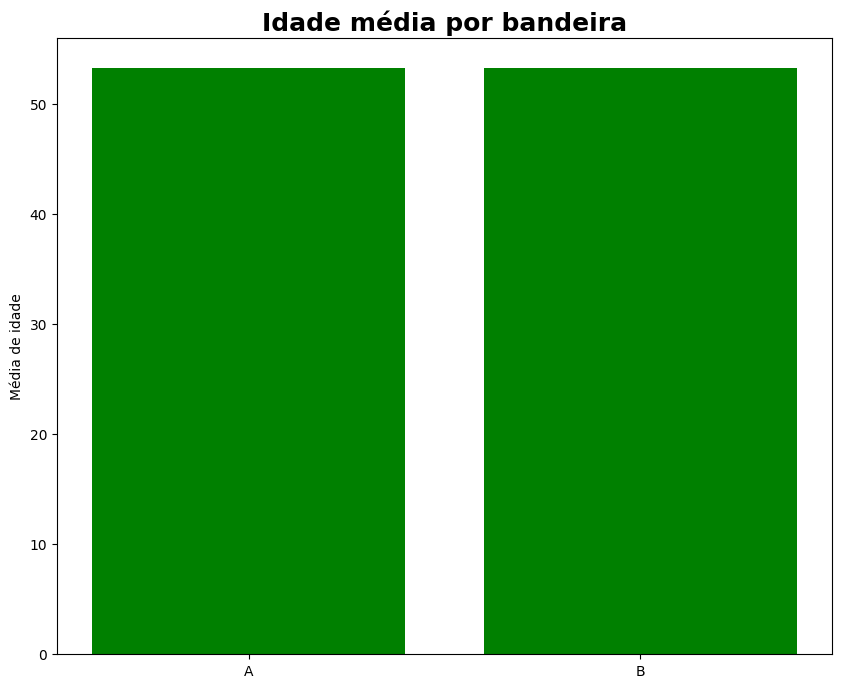

In [63]:
fig = plt.figure(figsize=(10,8))
plt.bar(agg_idade_bandeira["bandeira"], agg_idade_bandeira["idade"], color="green")
plt.ylabel("Média de idade")
plt.title("Idade média por bandeira", loc="center", fontsize=18, fontweight="bold", color="black")

Text(0.5, 1.0, 'Média de renda por canal de venda')

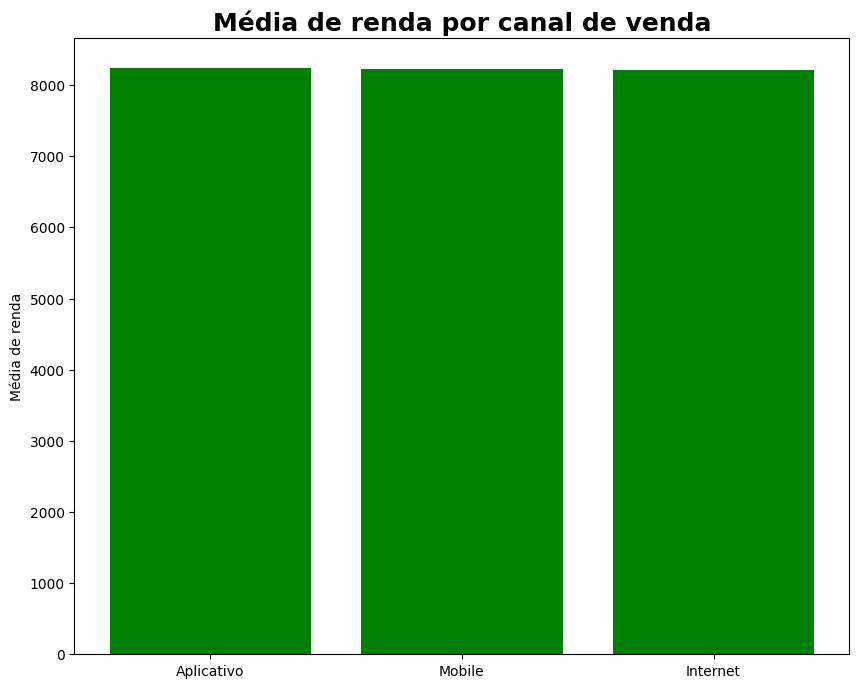

In [66]:

fig = plt.figure(figsize=(10,8))
plt.bar(agg_idcanal_renda["idcanalvenda"], agg_idcanal_renda["renda"], color="green")
plt.ylabel("Média de renda")
plt.title("Média de renda por canal de venda", loc="center", fontsize=18, fontweight="bold", color="black")

In [67]:
vendas_por_data = vendas_corretas.groupby("Data").idcompra.nunique().reset_index()
vendas_por_data

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198
...,...,...
114,2023-04-26,200
115,2023-04-27,212
116,2023-04-28,192
117,2023-04-29,187


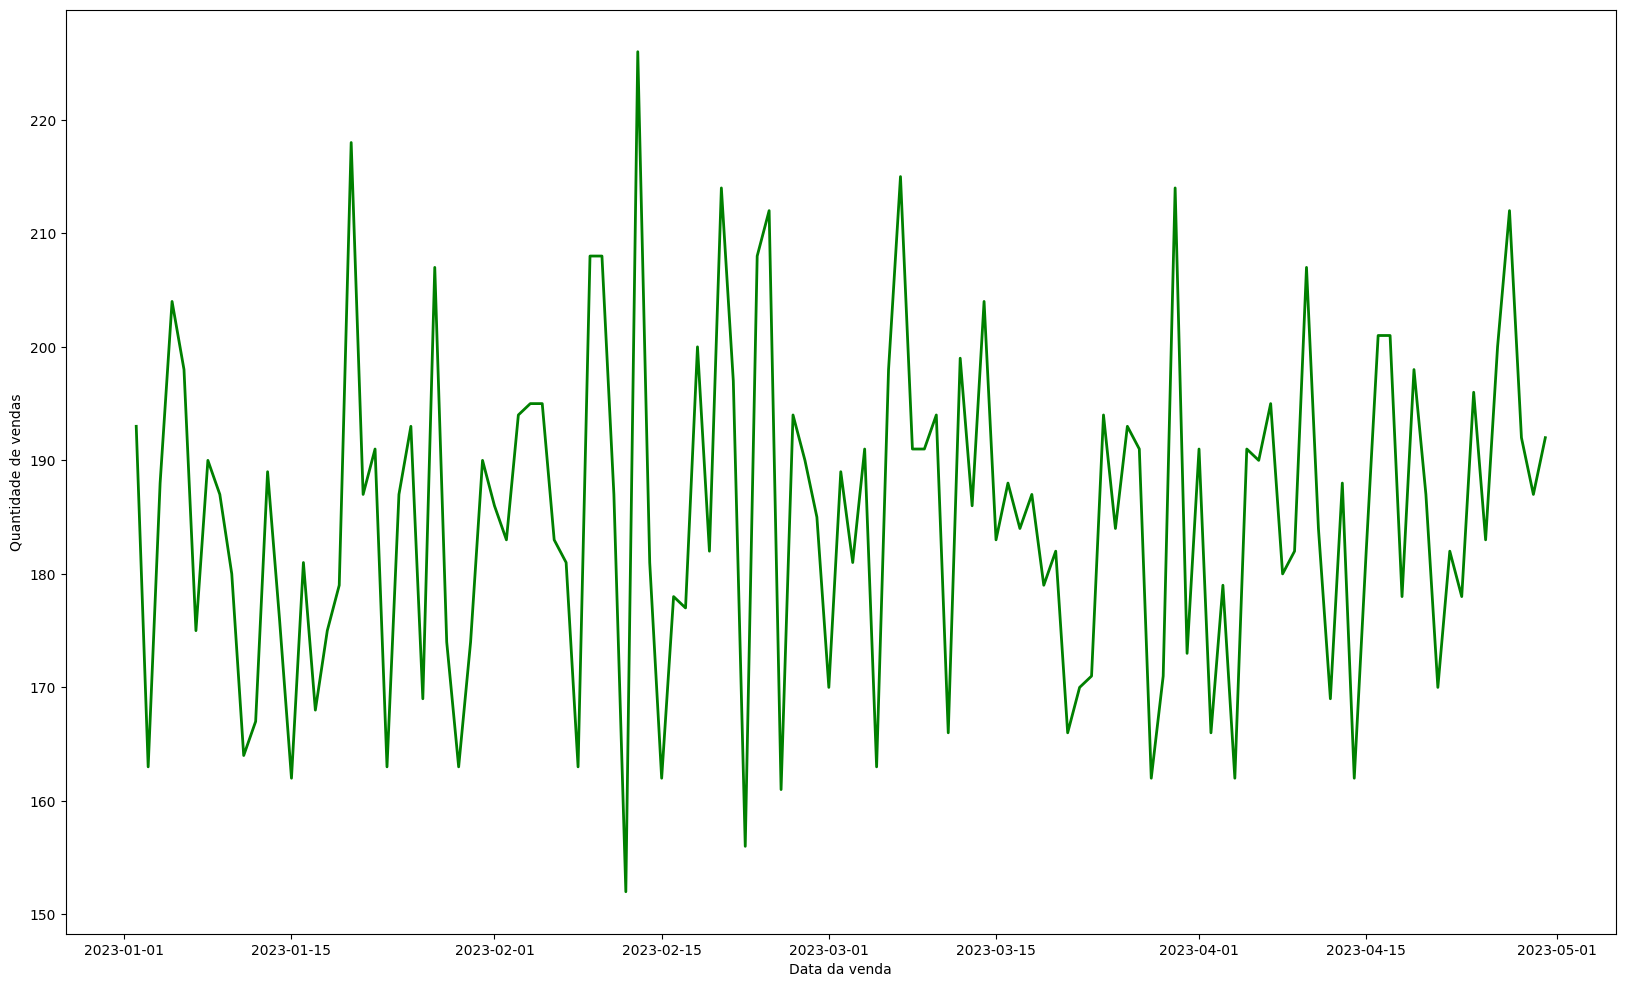

In [70]:
fig = plt.figure(figsize=(20,12))
plt.xlabel("Data da venda")
plt.ylabel("Quantidade de vendas")
x = vendas_por_data["Data"]
y = vendas_por_data["idcompra"]

plt.plot(x,y, color = "green", linewidth = "2")
plt.show()

In [71]:
agg_dept_preco = round(vendas_corretas.groupby("Nome_Departamento").Preço_com_frete.agg("mean").sort_values(ascending = False).reset_index(),2)
agg_dept_preco

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


Text(0.5, 1.0, 'Preço médio por departamento')

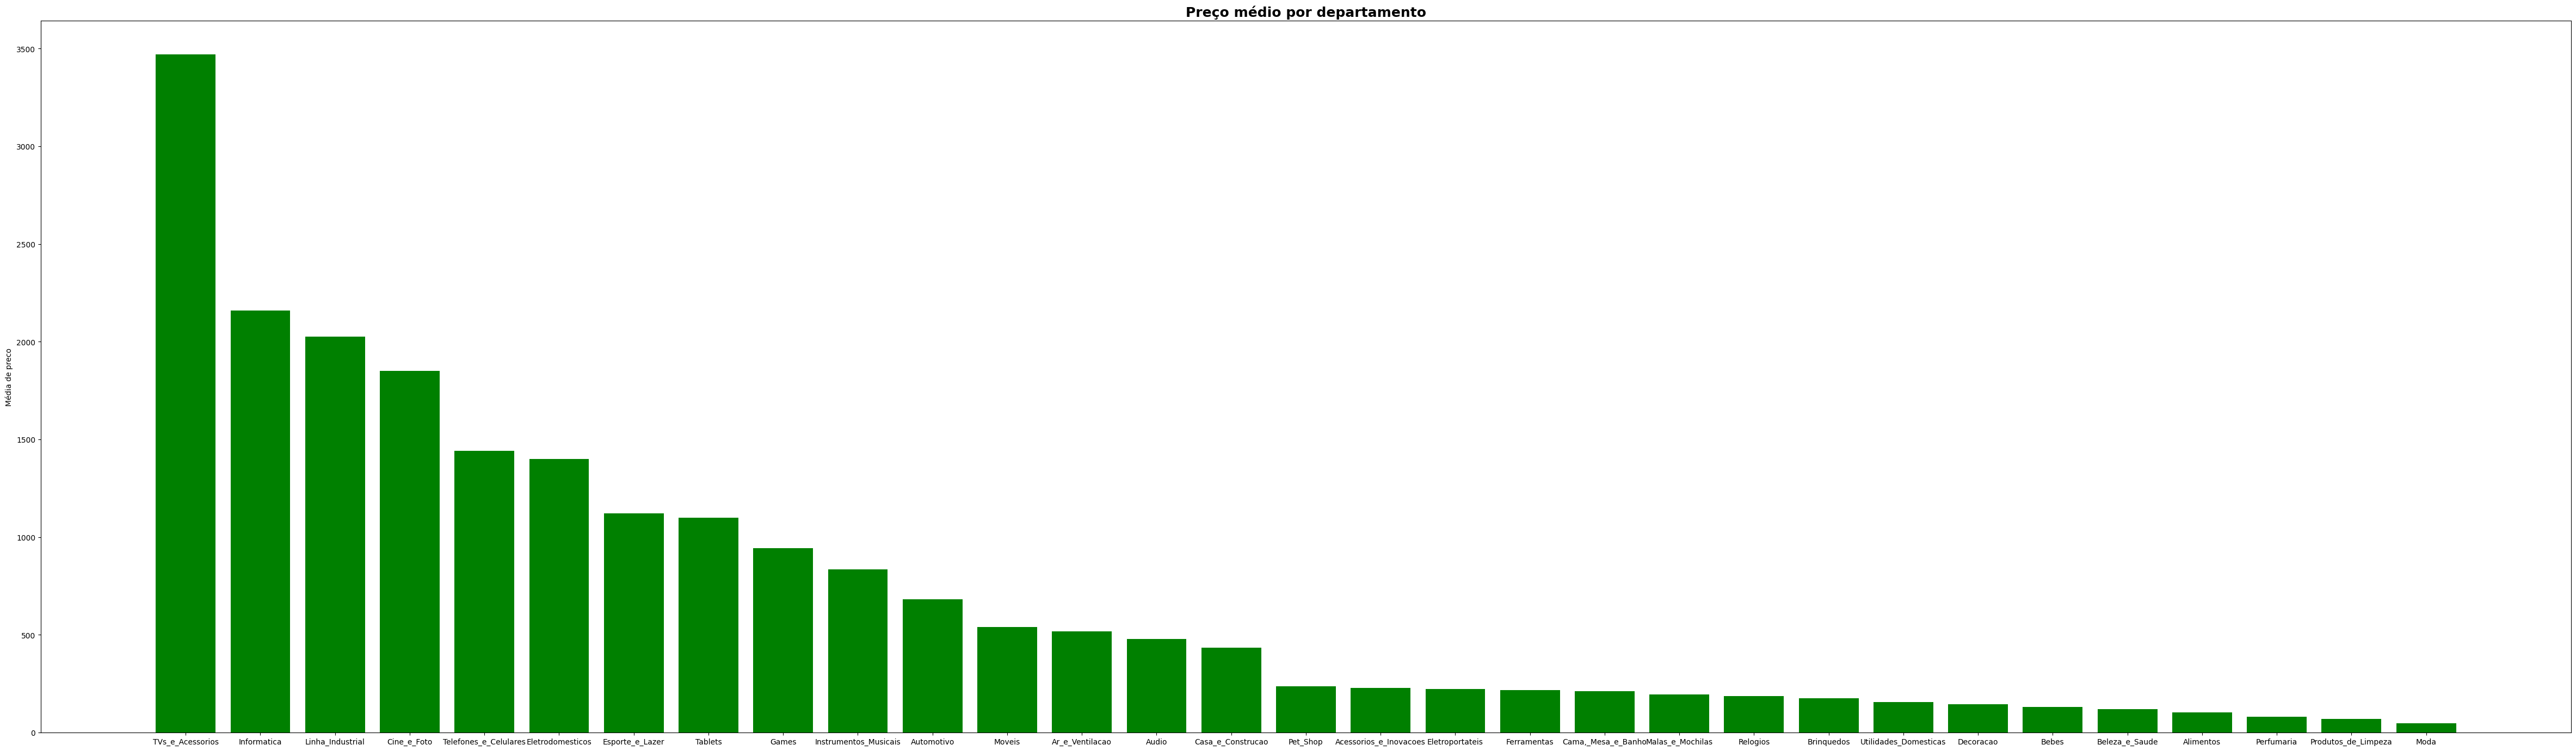

In [76]:

fig = plt.figure(figsize=(60,17))
plt.bar(agg_dept_preco["Nome_Departamento"], agg_dept_preco["Preço_com_frete"], color="green")
plt.ylabel("Média de preco")
plt.title("Preço médio por departamento", loc="center", fontsize=18, fontweight="bold", color="black")

#Data Visualization com Plotly

In [77]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.1 MB/s eta 0:00:00


In [78]:
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects
import plotly.express as px

In [79]:
px.bar(agg_idade_bandeira, x = "bandeira", y = "idade")

In [80]:
px.line(vendas_por_data, x = "Data", y="idcompra")

In [83]:
px.bar(agg_dept_preco, x = "Nome_Departamento", y="Preço_com_frete")